**Lowest bid**

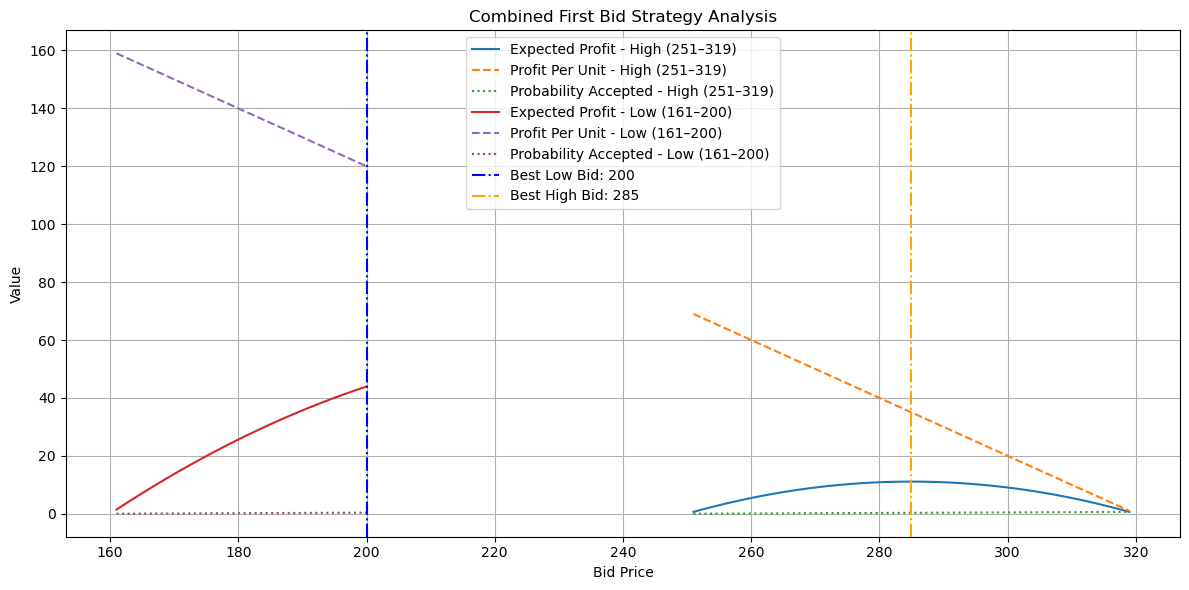

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

P1 = 41 / 112  # Probability of reserve in [160, 200]
P2 = 71 / 112  # Probability of reserve in [250, 320]
PRICE_SELL = 320

# expected PnL
def expected_pnl_low(bid):
    if bid < 161 or bid > 200:
        return 0, 0, 0
    prob_accept = P1 * (bid - 160) / 40
    profit_per_unit = PRICE_SELL - bid
    return prob_accept, profit_per_unit, prob_accept * profit_per_unit

def expected_pnl_high(bid):
    if bid < 251 or bid > 319:
        return 0, 0, 0
    prob_accept = P2 * (bid - 250) / 70
    profit_per_unit = PRICE_SELL - bid
    return prob_accept, profit_per_unit, prob_accept * profit_per_unit

# lower part bid data
bids_low = np.arange(161, 201)
results_low = []
for bid in bids_low:
    prob, profit_per_unit, expected_profit = expected_pnl_low(bid)
    results_low.append({
        "Bid": bid,
        "Probability_Accepted": prob,
        "Profit_Per_Unit": profit_per_unit,
        "Expected_Profit": expected_profit,
        "Range": "Low (161–200)"
    })
df_low = pd.DataFrame(results_low)

# higher part bid data
bids_high = np.arange(251, 320)
results_high = []
for bid in bids_high:
    prob, profit_per_unit, expected_profit = expected_pnl_high(bid)
    results_high.append({
        "Bid": bid,
        "Probability_Accepted": prob,
        "Profit_Per_Unit": profit_per_unit,
        "Expected_Profit": expected_profit,
        "Range": "High (251–319)"
    })
df_high = pd.DataFrame(results_high)

# Combine data
df_combined = pd.concat([df_low, df_high], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
for label, group in df_combined.groupby("Range"):
    plt.plot(group["Bid"], group["Expected_Profit"], label=f"Expected Profit - {label}")
    plt.plot(group["Bid"], group["Profit_Per_Unit"], linestyle='--', label=f"Profit Per Unit - {label}")
    plt.plot(group["Bid"], group["Probability_Accepted"], linestyle=':', label=f"Probability Accepted - {label}")
best_low = df_low.loc[df_low["Expected_Profit"].idxmax()]
best_high = df_high.loc[df_high["Expected_Profit"].idxmax()]
plt.axvline(best_low["Bid"], color='blue', linestyle='-.', label=f'Best Low Bid: {int(best_low["Bid"])}')
plt.axvline(best_high["Bid"], color='orange', linestyle='-.', label=f'Best High Bid: {int(best_high["Bid"])}')

plt.xlabel("Bid Price")
plt.ylabel("Value")
plt.title("Combined First Bid Strategy Analysis")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


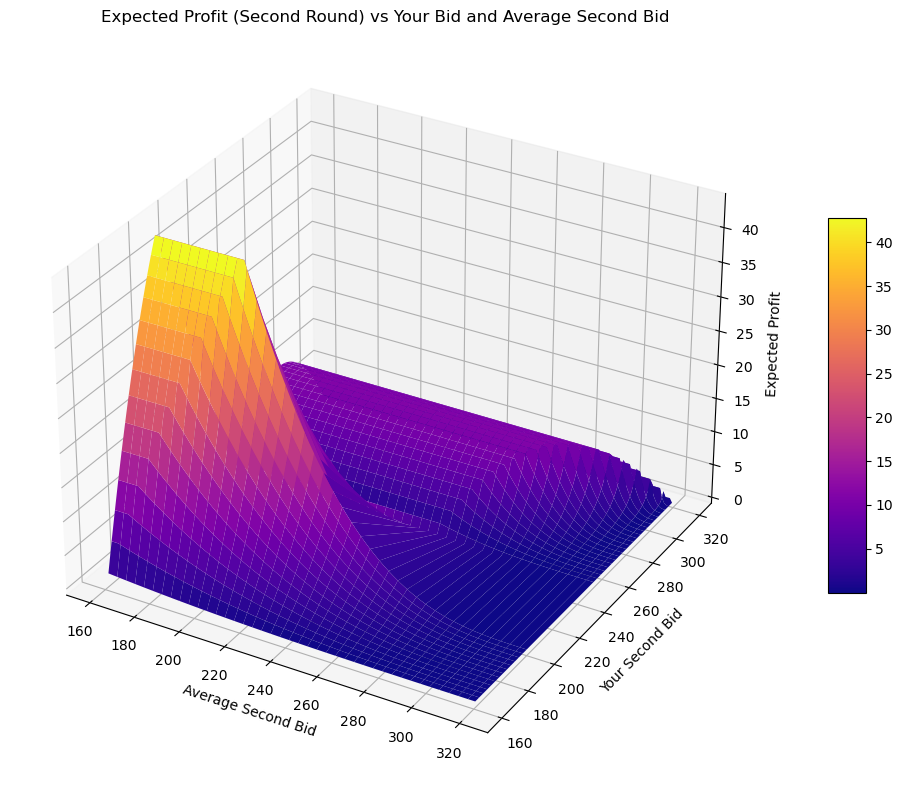

In [10]:
average_bids = np.arange(161, 321)
my_bids = np.concatenate((np.arange(161, 201), np.arange(251, 320)))
X, Y = np.meshgrid(average_bids, my_bids)
Z = np.zeros_like(X, dtype=float)

# expected profit for each (my_bid, average_bid) pair
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        bid = Y[i, j]
        avg_bid = X[i, j]

        if 161 <= bid <= 200:
            prob_accept = P1 * (bid - 160) / 40
        elif 251 <= bid <= 320:
            prob_accept = P2 * (bid - 250) / 70
        else:
            prob_accept = 0  # 201–250, no trades possible

        profit_per_unit = PRICE_SELL - bid

        # penalty if bid < average
        if bid >= avg_bid:
            p = 1.0
        elif bid < avg_bid and bid >= 161:
            p = ((PRICE_SELL - avg_bid) / (PRICE_SELL - bid)) ** 3
        else:
            p = 0

        expected_profit = prob_accept * profit_per_unit * p
        Z[i, j] = expected_profit

# Create 3D surface plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

ax.set_xlabel('Average Second Bid')
ax.set_ylabel('Your Second Bid')
ax.set_zlabel('Expected Profit')
ax.set_title('Expected Profit (Second Round) vs Your Bid and Average Second Bid')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


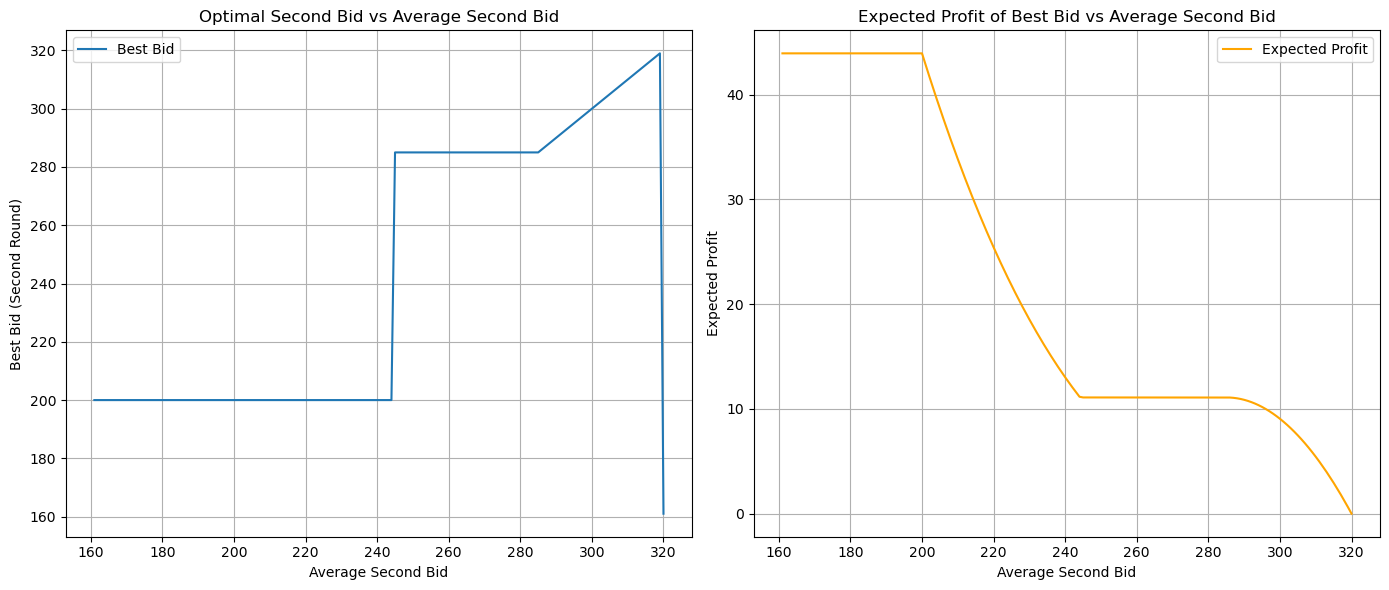

In [12]:
# Re-import pandas due to reset state
import pandas as pd

# Repeat calculation now with pandas available
optimal_bids = []
optimal_profits = []

for j in range(X.shape[1]):
    column = Z[:, j]
    max_idx = np.argmax(column)
    best_bid = Y[max_idx, j]
    best_profit = column[max_idx]
    avg_bid = X[max_idx, j]
    optimal_bids.append({
        "Average_Second_Bid": avg_bid,
        "Best_Bid": best_bid,
        "Expected_Profit": best_profit
    })

#df_optimal_bids = pd.DataFrame(optimal_bids)
#df_optimal_bids.head(1000)
# Plot the full trend of optimal bids and their expected profits as average bid changes
plt.figure(figsize=(14, 6))

# Plot Best Bid vs Average Bid
plt.subplot(1, 2, 1)
plt.plot(df_optimal_bids["Average_Second_Bid"], df_optimal_bids["Best_Bid"], label="Best Bid")
plt.xlabel("Average Second Bid")
plt.ylabel("Best Bid (Second Round)")
plt.title("Optimal Second Bid vs Average Second Bid")
plt.grid(True)
plt.legend()

# Plot Expected Profit vs Average Bid
plt.subplot(1, 2, 2)
plt.plot(df_optimal_bids["Average_Second_Bid"], df_optimal_bids["Expected_Profit"], label="Expected Profit", color='orange')
plt.xlabel("Average Second Bid")
plt.ylabel("Expected Profit")
plt.title("Expected Profit of Best Bid vs Average Second Bid")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


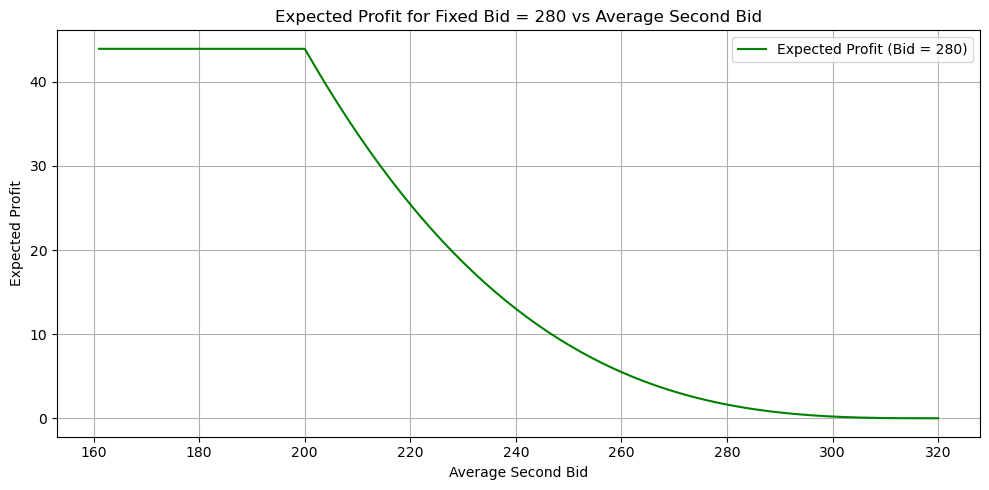

In [20]:
# Compute expected profit for a fixed bid (280) against all average second bid values
fixed_bid = 200
expected_profits_fixed = []

for avg_bid in average_bids:
    # Determine which distribution applies
    if 161 <= fixed_bid <= 200:
        prob_accept = P1 * (fixed_bid - 160) / 40
    elif 251 <= fixed_bid <= 320:
        prob_accept = P2 * (fixed_bid - 250) / 70
    else:
        prob_accept = 0  # Invalid bid range

    profit_per_unit = PRICE_SELL - fixed_bid

    # Penalty logic
    if fixed_bid >= avg_bid:
        p = 1.0
    elif fixed_bid >= 161:
        p = ((PRICE_SELL - avg_bid) / (PRICE_SELL - fixed_bid)) ** 3
    else:
        p = 0

    expected_profit = prob_accept * profit_per_unit * p
    expected_profits_fixed.append(expected_profit)

# Plot fixed bid (280) against average second bids
plt.figure(figsize=(10, 5))
plt.plot(average_bids, expected_profits_fixed, label="Expected Profit (Bid = 280)", color='green')
plt.xlabel("Average Second Bid")
plt.ylabel("Expected Profit")
plt.title("Expected Profit for Fixed Bid = 280 vs Average Second Bid")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


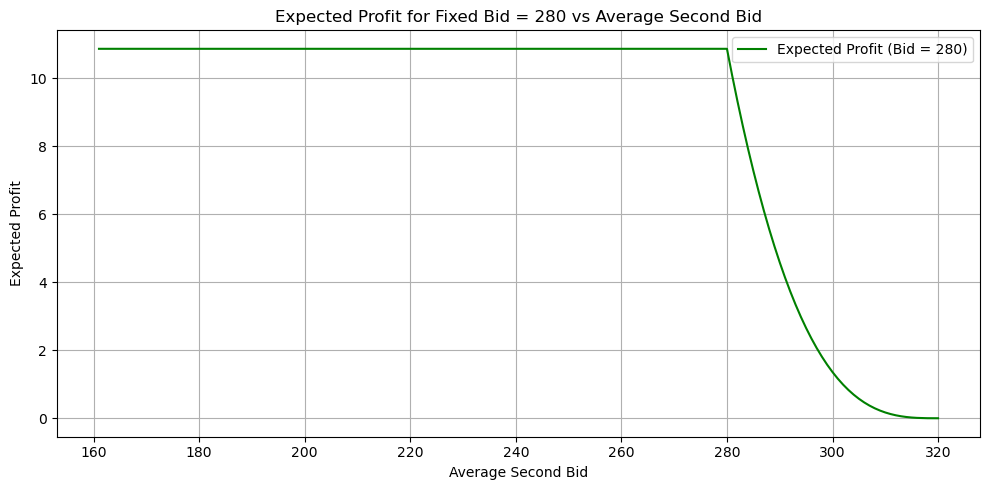

In [25]:
# Compute expected profit for a fixed bid (280) against all average second bid values
fixed_bid = 280
expected_profits_fixed = []

for avg_bid in average_bids:
    # Determine which distribution applies
    if 161 <= fixed_bid <= 200:
        prob_accept = P1 * (fixed_bid - 160) / 40
    elif 251 <= fixed_bid <= 320:
        prob_accept = P2 * (fixed_bid - 250) / 70
    else:
        prob_accept = 0  # Invalid bid range

    profit_per_unit = PRICE_SELL - fixed_bid

    # Penalty logic
    if fixed_bid >= avg_bid:
        p = 1.0
    elif fixed_bid >= 161:
        p = ((PRICE_SELL - avg_bid) / (PRICE_SELL - fixed_bid)) ** 3
    else:
        p = 0

    expected_profit = prob_accept * profit_per_unit * p
    expected_profits_fixed.append(expected_profit)

# Plot fixed bid (280) against average second bids
plt.figure(figsize=(10, 5))
plt.plot(average_bids, expected_profits_fixed, label="Expected Profit (Bid = 280)", color='green')
plt.xlabel("Average Second Bid")
plt.ylabel("Expected Profit")
plt.title("Expected Profit for Fixed Bid = 280 vs Average Second Bid")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


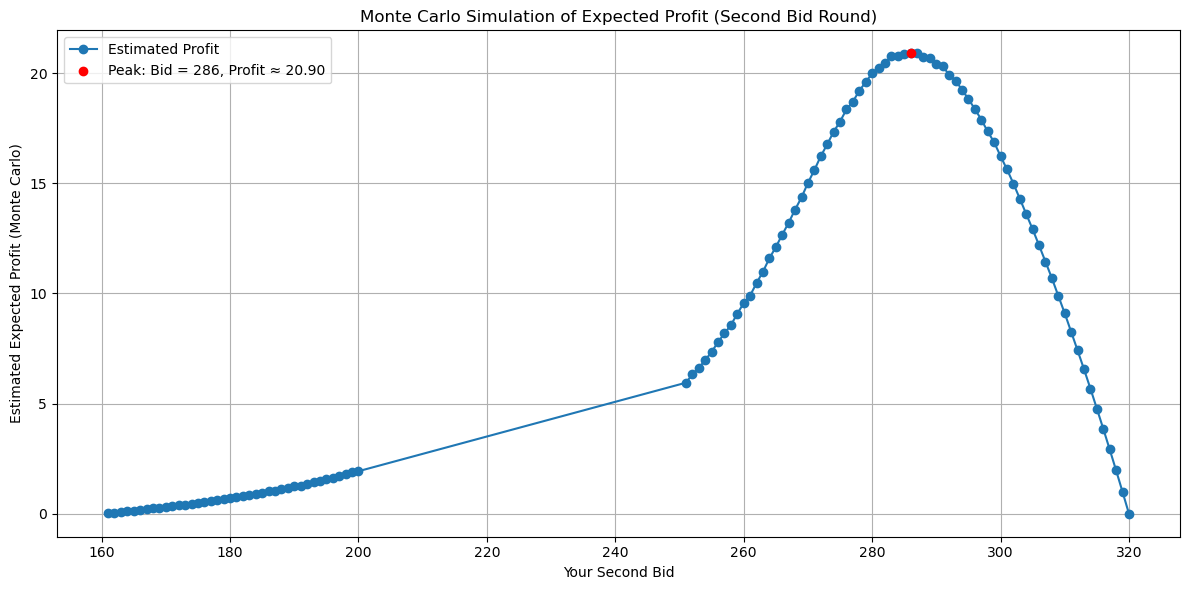

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
PRICE_SELL = 320
P1 = 41 / 112  # Probability of reserve in [160, 200]
P2 = 71 / 112  # Probability of reserve in [250, 320]

# Valid bid range for second round
valid_bids = np.concatenate((np.arange(161, 201), np.arange(251, 321)))

# Monte Carlo simulation function
def monte_carlo_second_bid(bid, num_samples=100000):
    reserves = np.zeros(num_samples)
    
    # Simulate reserve prices based on the bimodal distribution
    modes = np.random.choice(['low', 'high'], size=num_samples, p=[P1, P2])
    low_reserves = np.random.uniform(160, 200, size=num_samples)
    high_reserves = np.random.uniform(250, 320, size=num_samples)
    reserves[modes == 'low'] = low_reserves[modes == 'low']
    reserves[modes == 'high'] = high_reserves[modes == 'high']

    # Simulate average bids across traders (e.g., normal around 280 ± 10)
    avg_bids = np.random.normal(loc=280, scale=10, size=num_samples)
    avg_bids = np.clip(avg_bids, 161, 320)

    # Determine acceptance (bid must be > reserve)
    accepted = bid > reserves

    # Penalty for bids below average
    with np.errstate(divide='ignore', invalid='ignore'):
        p_scale = np.where(
            bid >= avg_bids,
            1.0,
            ((PRICE_SELL - avg_bids) / (PRICE_SELL - bid)) ** 3
        )

    # Profit per accepted trade
    profit = (PRICE_SELL - bid) * accepted * p_scale

    # Estimate expected profit
    expected_profit = np.mean(profit)
    return expected_profit

# Run simulation for a range of valid bids
monte_bids = valid_bids
monte_profits = [monte_carlo_second_bid(bid) for bid in monte_bids]

# Identify the bid with the highest estimated profit
max_profit_index = np.argmax(monte_profits)
best_bid = monte_bids[max_profit_index]
best_profit = monte_profits[max_profit_index]

# Plot results with peak marked
plt.figure(figsize=(12, 6))
plt.plot(monte_bids, monte_profits, marker='o', label="Estimated Profit")
plt.scatter(best_bid, best_profit, color='red', zorder=5, label=f"Peak: Bid = {best_bid}, Profit ≈ {best_profit:.2f}")
plt.xlabel("Your Second Bid")
plt.ylabel("Estimated Expected Profit (Monte Carlo)")
plt.title("Monte Carlo Simulation of Expected Profit (Second Bid Round)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


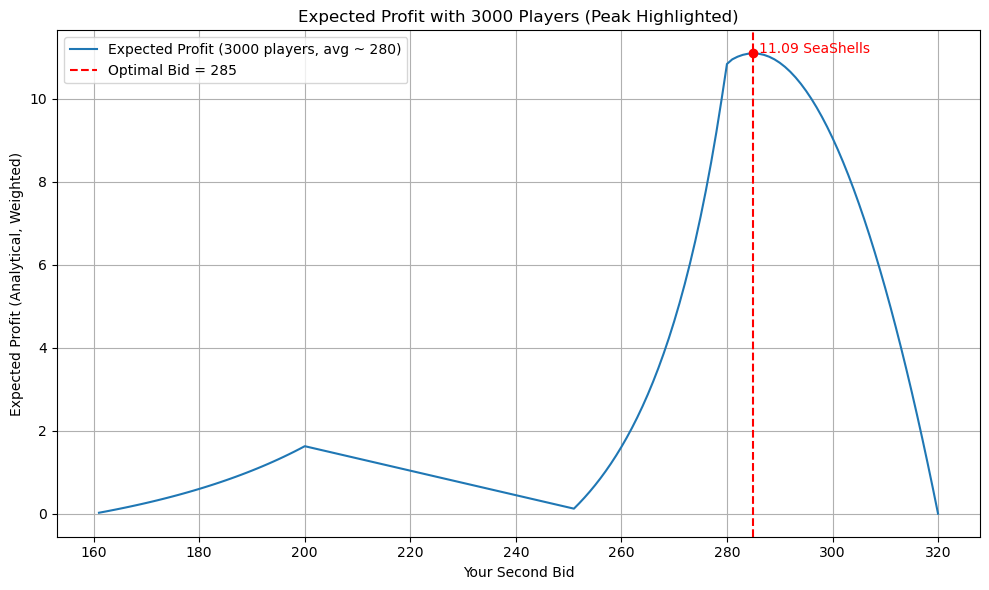

In [30]:
# Updated analytical model assuming 3000 players
# We'll approximate the average second bid as a normal distribution around a central value (e.g., 280 ± 5)
# and use the mean of this distribution as the average bid, assuming the law of large numbers

num_players = 3000
avg_bid_mean = 280
avg_bid_std = 5 / np.sqrt(num_players)  # std dev of the average decreases with more players
avg_bid_range = np.linspace(avg_bid_mean - 3 * avg_bid_std, avg_bid_mean + 3 * avg_bid_std, 50)

# Evaluate expected profit for each bid over the expected distribution of average bids
from scipy.stats import norm

valid_bids = np.concatenate((np.arange(161, 201), np.arange(251, 321)))
profits_for_avg_bids = []

for avg_bid in avg_bid_range:
    profits = [expected_profit_analytical(bid, avg_bid) for bid in valid_bids]
    profits_for_avg_bids.append(profits)

# Average expected profit across distribution of average bids
weights = norm.pdf(avg_bid_range, loc=avg_bid_mean, scale=avg_bid_std)
weights /= np.sum(weights)  # Normalize to sum to 1

expected_profits_weighted = np.average(profits_for_avg_bids, axis=0, weights=weights)

# Find the optimal bid and profit from the weighted analytical results
max_index = np.argmax(expected_profits_weighted)
optimal_bid = valid_bids[max_index]
optimal_profit = expected_profits_weighted[max_index]

# Plot the results with the peak annotated
plt.figure(figsize=(10, 6))
plt.plot(valid_bids, expected_profits_weighted, label=f'Expected Profit (3000 players, avg ~ {avg_bid_mean})')
plt.axvline(optimal_bid, color='red', linestyle='--', label=f'Optimal Bid = {optimal_bid}')
plt.scatter(optimal_bid, optimal_profit, color='red', zorder=5)
plt.text(optimal_bid + 1, optimal_profit, f'{optimal_profit:.2f} SeaShells', color='red')

plt.xlabel('Your Second Bid')
plt.ylabel('Expected Profit (Analytical, Weighted)')
plt.title('Expected Profit with 3000 Players (Peak Highlighted)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
